In [10]:
from Almanac.Data import get_weather_data
from Almanac.Data import get_frost_dates
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = get_weather_data("Chicago, IL", "2018-01-01", "2021-12-31")

In [4]:
df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,-19.1,-21.7,-16.1,0.0,51.0,281.0,16.9,NaN,1041.9,NaN
2018-01-02,-18.5,-23.3,-13.9,0.0,51.0,234.0,18.4,NaN,1035.2,NaN
2018-01-03,-10.0,-13.9,-7.8,0.0,51.0,279.0,20.7,NaN,1021.2,NaN
2018-01-04,-14.0,-16.7,-10.6,0.0,51.0,322.0,19.2,NaN,1027.6,NaN
2018-01-05,-14.8,-17.8,-11.1,0.0,51.0,315.0,16.7,NaN,1032.1,NaN


<Axes: xlabel='time'>

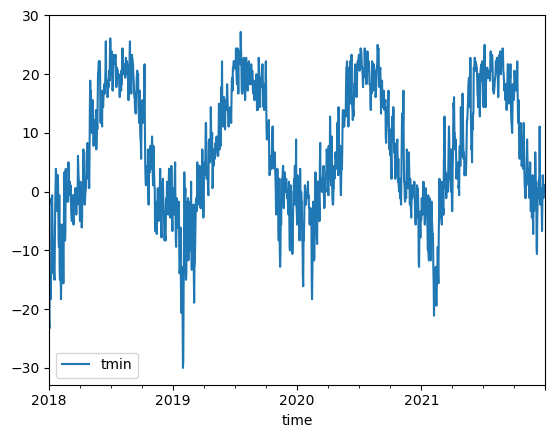

In [11]:
df.plot(y="tmin")

In [6]:
first, last = get_frost_dates(df)

In [8]:
f = pd.Series(first)
s = pd.Series(last)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
decomp = seasonal_decompose(
    df["tmin"], model="add", extrapolate_trend="freq", period=365
)

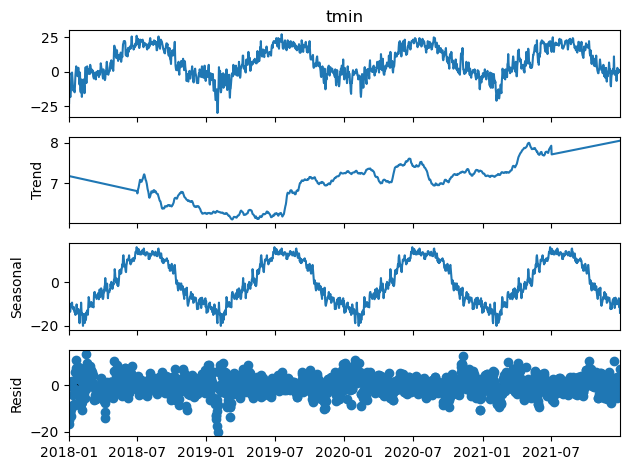

In [22]:
decomp.plot();

In [23]:
from statsmodels.tsa.statespace import sarimax

In [27]:
mod = sarimax.SARIMAX(
    df["tmin"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
)

In [28]:
r = mod.fit()

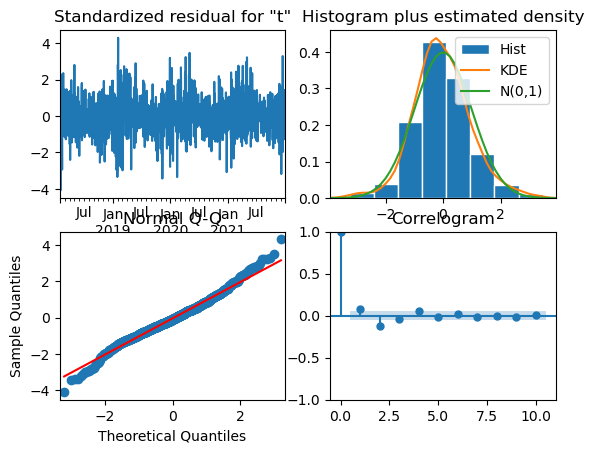

In [30]:
r.plot_diagnostics();

In [47]:
pred = r.get_prediction(start="2019-01-01", dynamic=False)

<Axes: xlabel='time'>

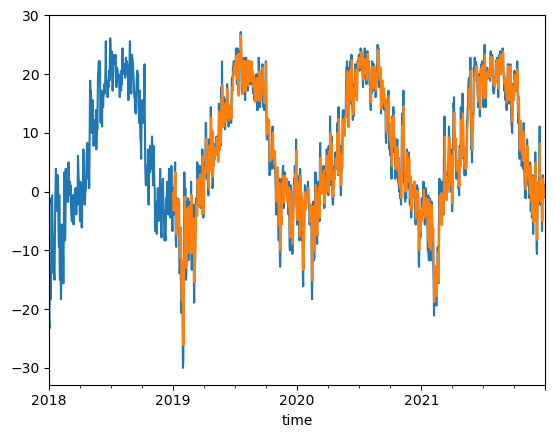

In [49]:
df["tmin"].plot()
pred.predicted_mean.plot()

In [50]:
type(pred)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

<Axes: >

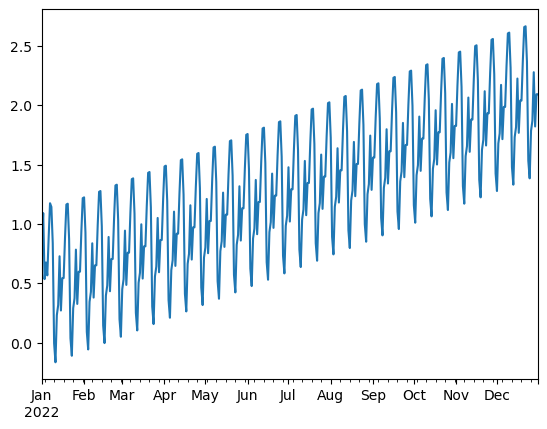

In [61]:
r.forecast("2022-12-31", dynamic=False).plot()